# Exploramos el dataset con 3 canales

In [31]:
import os
import glob
from PIL import Image
import torch
from torchvision import transforms
import shutil
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random


In [27]:
cancer_path = "/home/anna/TFM/TFM-Mask/data/ControlCancer_aug/Cancer"
controles_path = "/home/anna/TFM/TFM-Mask/data/ControlCancer_aug/Control"
output_path = "/home/anna/TFM/TFM-Mask/data/Mask_aug"

os.makedirs(output_path, exist_ok=True)

In [28]:
def collect_mask_images(base_path, output_path):
    mask_image_paths = glob.glob(os.path.join(base_path, "*.jpg"), recursive=True)
    
    for img_path in mask_image_paths:
        filename = os.path.basename(img_path)

        dest_path = os.path.join(output_path, filename)
        
        shutil.copy(img_path, dest_path)
        print(f"Imagen copiada: {img_path} -> {dest_path}")

print("Procesando imágenes de la carpeta Cancer...")
collect_mask_images(cancer_path, output_path)

print("Procesando imágenes de la carpeta Controles...")
collect_mask_images(controles_path, output_path)

print(f"Todas las imágenes se han centralizado en {output_path}")


Procesando imágenes de la carpeta Cancer...
Imagen copiada: /home/anna/TFM/TFM-Mask/data/ControlCancer_aug/Cancer/00097C_aug03(1).jpg -> /home/anna/TFM/TFM-Mask/data/Mask_aug/00097C_aug03(1).jpg
Imagen copiada: /home/anna/TFM/TFM-Mask/data/ControlCancer_aug/Cancer/00090C(1).jpg -> /home/anna/TFM/TFM-Mask/data/Mask_aug/00090C(1).jpg
Imagen copiada: /home/anna/TFM/TFM-Mask/data/ControlCancer_aug/Cancer/00005C_aug05(1).jpg -> /home/anna/TFM/TFM-Mask/data/Mask_aug/00005C_aug05(1).jpg
Imagen copiada: /home/anna/TFM/TFM-Mask/data/ControlCancer_aug/Cancer/00048C_aug01(1).jpg -> /home/anna/TFM/TFM-Mask/data/Mask_aug/00048C_aug01(1).jpg
Imagen copiada: /home/anna/TFM/TFM-Mask/data/ControlCancer_aug/Cancer/00040C_aug09(1).jpg -> /home/anna/TFM/TFM-Mask/data/Mask_aug/00040C_aug09(1).jpg
Imagen copiada: /home/anna/TFM/TFM-Mask/data/ControlCancer_aug/Cancer/00070C(1).jpg -> /home/anna/TFM/TFM-Mask/data/Mask_aug/00070C(1).jpg
Imagen copiada: /home/anna/TFM/TFM-Mask/data/ControlCancer_aug/Cancer/0006

In [42]:
image_count = len([file for file in os.listdir(output_path) if file.endswith(".jpg")])
print(f"El número total de imágenes en el dataset es: {image_count}")


El número total de imágenes en el dataset es: 2522


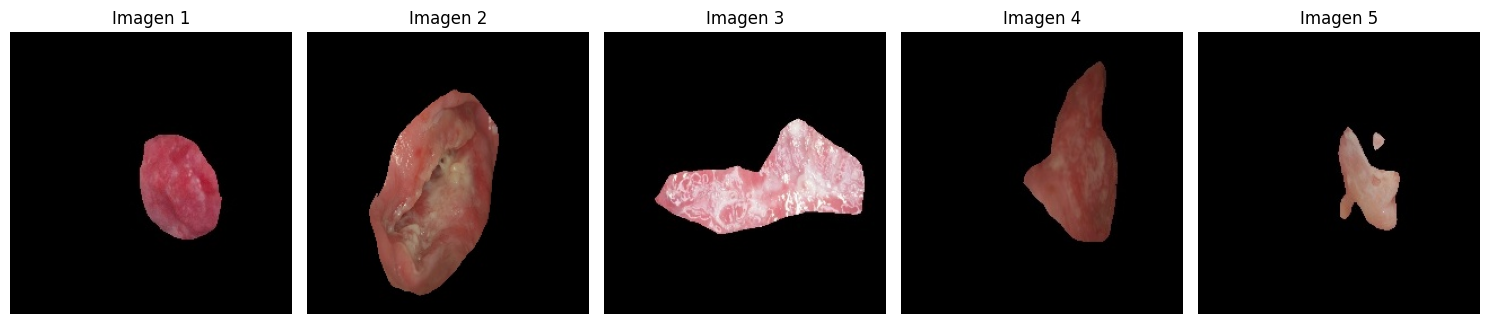

In [24]:
image_paths = [os.path.join(output_path, file) for file in os.listdir(output_path) if file.endswith(".jpg")]

num_images_to_display = 5

fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 15))

for i in range(min(num_images_to_display, len(image_paths))):
    img = Image.open(image_paths[i])  
    
    axes[i].imshow(img) 
    axes[i].axis('off') 
    axes[i].set_title(f"Imagen {i+1}") 

plt.tight_layout()
plt.show()


In [6]:
# Tamaños y canales

image_sizes = []

for i in range(num_images_to_display):
    img = Image.open(image_paths[i])
    img_array = np.array(img)
    image_sizes.append(img.size)
    
    axes[i].imshow(img)
    axes[i].axis('off')  
    axes[i].set_title(f"Imagen {i+1} - {img.size}")

plt.show()

for i in range(min(num_images_to_display, len(image_paths))):
    img = Image.open(image_paths[i])
    img_array = np.array(img)
    
    print(f"\nImagen {i+1}:")
    print(f"Tamaño de la imagen: {img.size} (Ancho x Alto)")
    print(f"Forma del array (alto, ancho, canales): {img_array.shape}")
    print(f"Número de canales: {img_array.shape[2]}")  
    print(f"Min valor de pixel: {img_array.min()}, Max valor de pixel: {img_array.max()}")



Imagen 1:
Tamaño de la imagen: (250, 250) (Ancho x Alto)
Forma del array (alto, ancho, canales): (250, 250, 3)
Número de canales: 3
Min valor de pixel: 0, Max valor de pixel: 230

Imagen 2:
Tamaño de la imagen: (250, 250) (Ancho x Alto)
Forma del array (alto, ancho, canales): (250, 250, 3)
Número de canales: 3
Min valor de pixel: 0, Max valor de pixel: 255

Imagen 3:
Tamaño de la imagen: (250, 250) (Ancho x Alto)
Forma del array (alto, ancho, canales): (250, 250, 3)
Número de canales: 3
Min valor de pixel: 0, Max valor de pixel: 255

Imagen 4:
Tamaño de la imagen: (250, 250) (Ancho x Alto)
Forma del array (alto, ancho, canales): (250, 250, 3)
Número de canales: 3
Min valor de pixel: 0, Max valor de pixel: 158

Imagen 5:
Tamaño de la imagen: (250, 250) (Ancho x Alto)
Forma del array (alto, ancho, canales): (250, 250, 3)
Número de canales: 3
Min valor de pixel: 0, Max valor de pixel: 251


### Opciones:

El modelo original está diseñado para imágenes de tamaño 572x572 (por defecto). Nuestras imágenes tienen un tamaño de 250x250, por lo que hay dos opciones:


Opción 1: Modificar la U-Net para aceptar imágenes de 250x250. 

Opción 2: Redimensionar tus imágenes a 572x572 (puede afectar la calidad).



_______________________________________________________________________________________________________________

#### Opción 2

2.1 ______________________

In [ ]:
image_dir = "/home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Mask_aug"
output_dir = "/home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Resized_Masks"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)


In [29]:
image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]

if len(image_paths) == 0:
    raise ValueError("No se encontraron imágenes en la carpeta especificada.")

In [ ]:
def display_images(image_paths, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    
    for i in range(min(num_images, len(image_paths))):
        img = cv2.imread(image_paths[i], cv2.IMREAD_GRAYSCALE)  
        
        if img is None:
            print(f"Error al cargar la imagen: {image_paths[i]}")
            continue

        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')  
        axes[i].set_title(f"Imagen {i+1}")
    
    plt.tight_layout()
    plt.show()


In [ ]:
for i, image_path in enumerate(image_paths):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    if img is None:
        print(f"Error al cargar la imagen: {image_path}")
        continue
  
    print(f"\nImagen {i+1}:")
    print(f"Tamaño original de la imagen: {img.shape[:2]}")
    print(f"Canales antes de la conversión (en color): {img.shape[2]}")  

    img_resized = cv2.resize(img, (572, 572))


    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

   
    print(f"Tamaño de la imagen redimensionada (572x572): {img_resized.shape[:2]}")
    print(f"Forma del array (alto, ancho) después de la conversión a gris: {img_gray.shape}")  
    print(f"Canales después de la conversión (en gris): {1 if len(img_gray.shape) == 2 else 'Más de un canal'}")

    img_normalized = img_gray / 255.0

  
    output_image_path = os.path.join(output_dir, f"resized_image_{i+1}.jpg")
    

    if not cv2.imwrite(output_image_path, img_gray):
        print(f"Error al guardar la imagen en {output_image_path}")
    else:
        print(f"Imagen guardada en {output_image_path}")
  
    print(f"Min valor de pixel: {img_gray.min()}, Max valor de pixel: {img_gray.max()}")



Imagen 1:
Tamaño original de la imagen: (250, 250)
Canales antes de la conversión (en color): 3
Tamaño de la imagen redimensionada (572x572): (572, 572)
Forma del array (alto, ancho) después de la conversión a gris: (572, 572)
Canales después de la conversión (en gris): 1
Imagen guardada en /home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Resized_Masks/resized_image_1.jpg
Min valor de pixel: 0, Max valor de pixel: 158

Imagen 2:
Tamaño original de la imagen: (250, 250)
Canales antes de la conversión (en color): 3
Tamaño de la imagen redimensionada (572x572): (572, 572)
Forma del array (alto, ancho) después de la conversión a gris: (572, 572)
Canales después de la conversión (en gris): 1
Imagen guardada en /home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Resized_Masks/resized_image_2.jpg
Min valor de pixel: 0, Max valor de pixel: 212

Imagen 3:
Tamaño original de la imagen: (250, 250)
Canales antes de la conversión (en color): 3
Tamaño de l

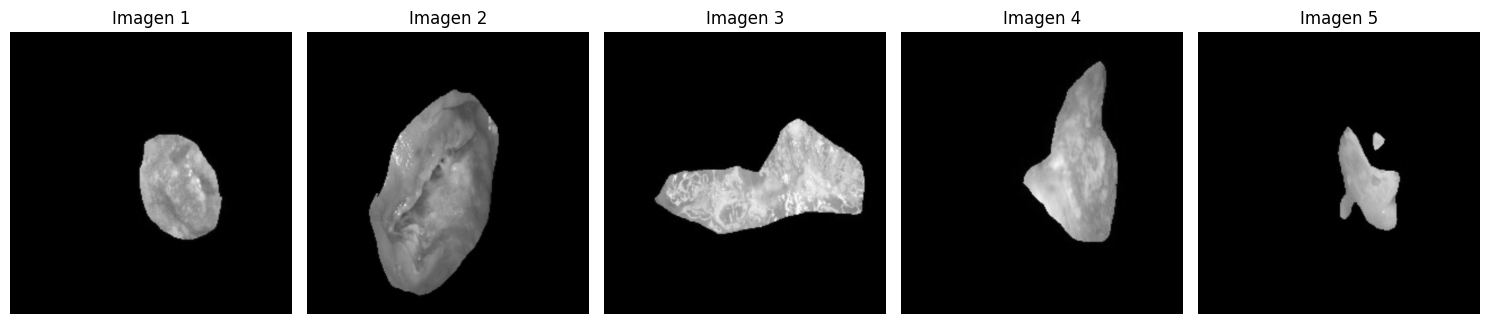

In [32]:
display_images([os.path.join(output_dir, f"resized_image_{i+1}.jpg") for i in range(min(5, len(image_paths)))])

2.2 _________________________________________________________

Imagen ya existe, omitiendo: /home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Resized_Masks_3canales/00097C_aug03_1/images/00097C_aug03_1.png
Imagen ya existe, omitiendo: /home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Resized_Masks_3canales/00090C_1/images/00090C_1.png
Imagen ya existe, omitiendo: /home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Resized_Masks_3canales/00005C_aug05_1/images/00005C_aug05_1.png
Imagen ya existe, omitiendo: /home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Resized_Masks_3canales/00048C_aug01_1/images/00048C_aug01_1.png
Imagen ya existe, omitiendo: /home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Resized_Masks_3canales/00108_aug00_1/images/00108_aug00_1.png
Imagen ya existe, omitiendo: /home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Resized_Masks_3canales/00148_1/images/00148_1.png
Imagen ya existe, omitiendo: /home/ann

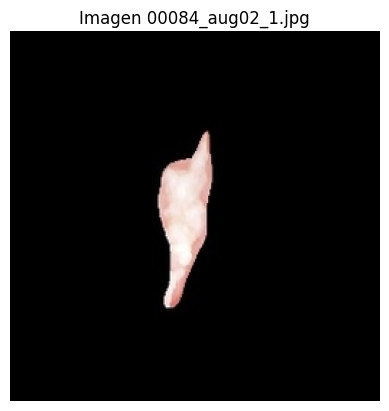


Características de la Imagen 00073_aug04_1.jpg:
Tamaño de la imagen: (256, 256) (Ancho x Alto)
Forma del array (alto, ancho, canales): (256, 256, 3)
Número de canales: 3
Valor mínimo de píxel: 0
Valor máximo de píxel: 255


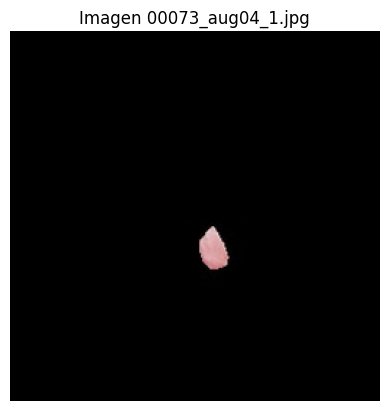


Características de la Imagen 00090C_aug08_1.jpg:
Tamaño de la imagen: (256, 256) (Ancho x Alto)
Forma del array (alto, ancho, canales): (256, 256, 3)
Número de canales: 3
Valor mínimo de píxel: 0
Valor máximo de píxel: 253


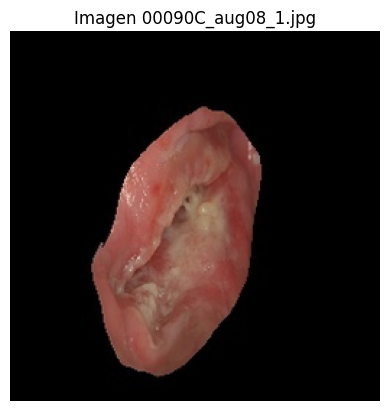


Características de la Imagen 00051C_aug06_1.jpg:
Tamaño de la imagen: (256, 256) (Ancho x Alto)
Forma del array (alto, ancho, canales): (256, 256, 3)
Número de canales: 3
Valor mínimo de píxel: 0
Valor máximo de píxel: 255


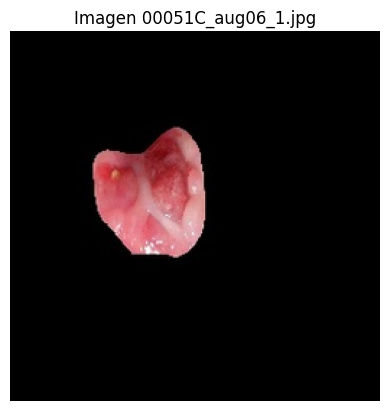


Características de la Imagen 00189_aug03_1.jpg:
Tamaño de la imagen: (256, 256) (Ancho x Alto)
Forma del array (alto, ancho, canales): (256, 256, 3)
Número de canales: 3
Valor mínimo de píxel: 0
Valor máximo de píxel: 248


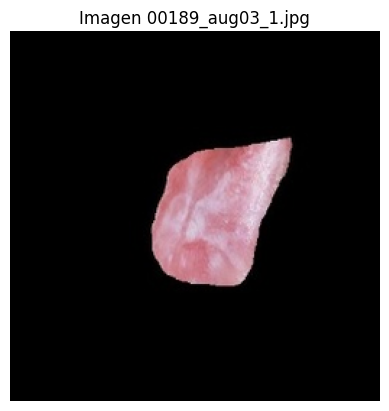

In [ ]:
image_dir = "/home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Mask_aug"
resized_output_path = "/home/anna/TFM/TFM-Radiomica/U-Net---Biomedical-Image-Segmentation/data/Resized_Masks_3canales"

if not os.path.exists(resized_output_path):
    os.makedirs(resized_output_path)

image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.jpg')]

for img_path in image_paths:
    filename = os.path.basename(img_path)
    filename_no_parentheses = filename.replace("(", "_").replace(")", "")  
    
    folder_name = filename_no_parentheses.replace('.jpg', '')  
    
    image_save_path = os.path.join(resized_output_path, folder_name, "images")
    masks_save_path = os.path.join(resized_output_path, folder_name, "masks")


    os.makedirs(image_save_path, exist_ok=True)
    os.makedirs(masks_save_path, exist_ok=True)

    img = Image.open(img_path)
    img_resized = img.resize((256, 256), Image.Resampling.LANCZOS)
    
    image_filename = os.path.join(image_save_path, filename_no_parentheses.replace('.jpg', '.png'))
    
    if not os.path.exists(image_filename):
        img_resized.save(image_filename)
        print(f"Imagen redimensionada y guardada: {image_filename}")
    else:
        print(f"Imagen ya existe, omitiendo: {image_filename}")


num_images_to_display = 5
sample_images = random.sample(image_paths, num_images_to_display)


for img_path in sample_images:
    filename = os.path.basename(img_path)
    filename_no_parentheses = filename.replace("(", "_").replace(")", "")  
    
    folder_name = filename_no_parentheses.replace('.jpg', '')
    image_save_path = os.path.join(resized_output_path, folder_name, "images")
    
    image_filename = os.path.join(image_save_path, filename_no_parentheses.replace('.jpg', '.png'))

    img_resized = Image.open(image_filename)
    
    img_array = np.array(img_resized)

    print(f"\nCaracterísticas de la Imagen {filename_no_parentheses}:")
    print(f"Tamaño de la imagen: {img_resized.size} (Ancho x Alto)")
    print(f"Forma del array (alto, ancho, canales): {img_array.shape}")
    print(f"Número de canales: {img_array.shape[2] if len(img_array.shape) > 2 else 1}")
    print(f"Valor mínimo de píxel: {img_array.min()}")
    print(f"Valor máximo de píxel: {img_array.max()}")

    plt.imshow(img_resized)
    plt.title(f"Imagen {filename_no_parentheses}")
    plt.axis('off')  
    plt.show()

